# Bellman 方程求解
书中该例子计算有误，以此为准。

In [1]:
import sympy
from sympy import symbols
sympy.init_printing()

### 求解 Bellman 期望方程

In [2]:
v_hungry, v_full = symbols('v_hungry v_full')
q_hungry_eat, q_hungry_none, q_full_eat, q_full_none = \
        symbols('q_hungry_eat q_hungry_none q_full_eat q_full_none')
alpha, beta, gamma = symbols('alpha beta gamma')
x, y = symbols('x y')

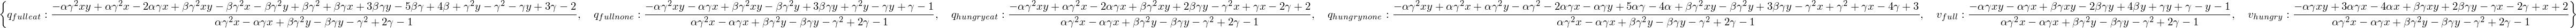

In [3]:
system = sympy.Matrix((
        (1, 0, x-1, -x, 0, 0, 0),
        (0, 1, 0, 0, -y, y-1, 0),
        (-gamma, 0, 1, 0, 0, 0, -2),
        ((alpha-1)*gamma, -alpha*gamma, 0, 1, 0, 0, 4*alpha-3),
        (-beta*gamma, (beta-1)*gamma, 0, 0, 1, 0, -4*beta+2),
        (0, -gamma, 0, 0, 0, 1, 1) ))
sympy.solve_linear_system(system,
        v_hungry, v_full,
        q_hungry_eat, q_hungry_none, q_full_eat, q_full_none)

### 求解 Bellman 最优方程

==== v(饿) = q(饿,不吃), v(饱) = q(饱,不吃) ==== x = 0, y = 1 ====


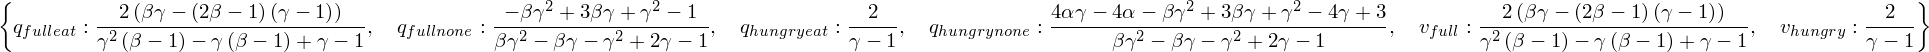

q(饿,不吃) - q(饿,吃) =


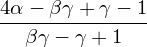

q(饱,不吃) - q(饱,吃) =


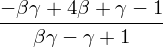

==== v(饿) = q(饿,不吃), v(饱) = q(饱,吃) ==== x = 0, y = 0 ====


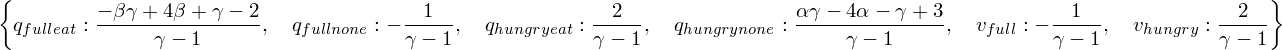

q(饿,不吃) - q(饿,吃) =


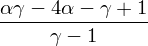

q(饱,不吃) - q(饱,吃) =


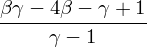

==== v(饿) = q(饿,吃), v(饱) = q(饱,不吃) ==== x = 1, y = 1 ====


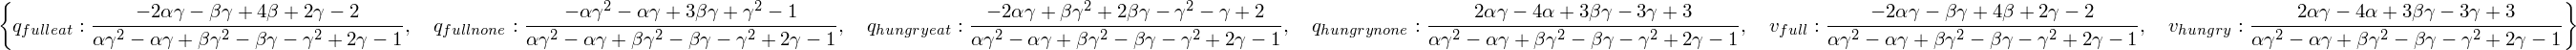

q(饿,不吃) - q(饿,吃) =


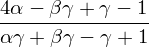

q(饱,不吃) - q(饱,吃) =


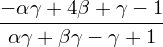

==== v(饿) = q(饿,吃), v(饱) = q(饱,吃) ==== x = 1, y = 0 ====


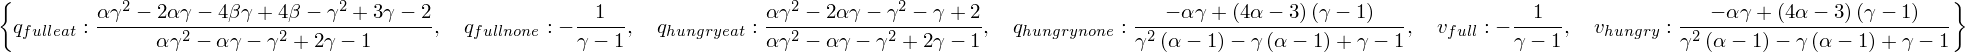

q(饿,不吃) - q(饿,吃) =


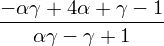

q(饱,不吃) - q(饱,吃) =


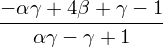

In [4]:
xy_tuples = ((0, 1), (0, 0), (1, 1), (1, 0))
for x, y in xy_tuples:
    system = sympy.Matrix((
            (1, 0, x-1, -x, 0, 0, 0),
            (0, 1, 0, 0, -y, y-1, 0),
            (-gamma, 0, 1, 0, 0, 0, -2),
            ((alpha-1)*gamma, -alpha*gamma, 0, 1, 0, 0, 4*alpha-3),
            (-beta*gamma, (beta-1)*gamma, 0, 0, 1, 0, -4*beta+2),
            (0, -gamma, 0, 0, 0, 1, 1) ))
    result = sympy.solve_linear_system(system,
            v_hungry, v_full,
            q_hungry_eat, q_hungry_none, q_full_eat, q_full_none, simplification=True)
    msgx = 'v(饿) = q(饿,{}吃)'.format('' if x else '不')
    msgy = 'v(饱) = q(饱,{}吃)'.format('不' if y else '')
    print('==== {}, {} ==== x = {}, y = {} ===='.format(msgx, msgy, x, y))
    display(result)
    print('q(饿,不吃) - q(饿,吃) =')
    display(sympy.simplify(result[q_hungry_none] - result[q_hungry_eat]))
    print('q(饱,不吃) - q(饱,吃) =')
    display(sympy.simplify(result[q_full_none] - result[q_full_eat]))